# MATH10098: Numerical Linear Algebra - Computer lab week 3

# Computer lab exercises
Work on these exercises with your partner during the live computer lab.

### Exercise 1: LU factorisation (Standard)

In the code cell below:

(i) Write a Python function `LU` to implement Algorithm LU from the lecture notes. As stated in the algorithm, your function should take a single input variable `A`, representing a matrix $A \in \mathbb{R}^{n\times n}$, and return two variables, `L` and `U`, representing the matrices $L, U \in \mathbb{R}^{n\times n}$ in the LU factorisation of $A$, such that $A = LU$.

(ii) Test your function on the following example:

$$
A =
\begin{bmatrix}
2&1&1 \\ 4&3&3 \\ 8&7&9
\end{bmatrix}
=
\begin{bmatrix}
1&0&0 \\ 2&1&0 \\ 4&3&1
\end{bmatrix}
\begin{bmatrix}
2&1&1 \\ 0&1&1 \\ 0&0&2
\end{bmatrix}
= LU.
$$

Here is the pseudo-code from the lecture notes:

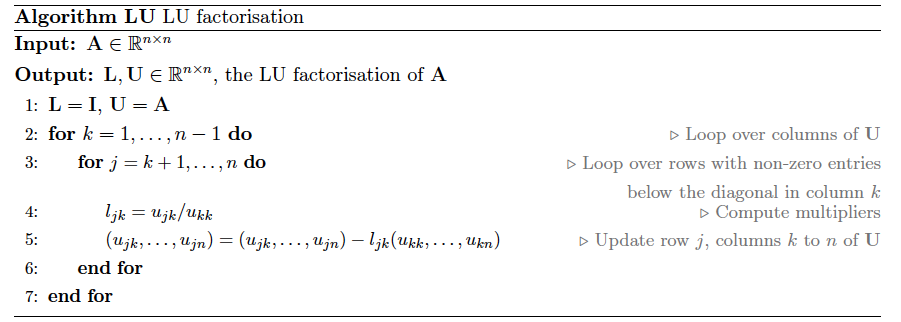

In [4]:
# Solution 
import numpy as np

def LU(A):
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise L, U
    L = np.eye(n)
    U = np.copy(A)

    for k in range(n - 1):
        for j in range(k + 1, n):
            L[j, k] = U[j, k] / U[k ,k]
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:]
    
    return L, U

A = np.array([[2, 1, 1], [4, 3, 3], [8, 7, 9]], dtype=float)
L, U = LU(A)
print(L)
print(U)

[[1. 0. 0.]
 [2. 1. 0.]
 [4. 3. 1.]]
[[2. 1. 1.]
 [0. 1. 1.]
 [0. 0. 2.]]


### Back Substitution

The function `BS` below solves the equation $Ux=y$, for a non-singular, upper triangular matrix $U\in \mathbb{R}^{n\times n}$ and a vector $y \in \mathbb{R}^n$, using Algorithm BS from the lecture notes. 

In [5]:
import numpy as np

def BS(U, y):
    n = U.shape[0]
    x = np.zeros(n)
    
    for j in range(n-1, -1, -1):
        x[j] = (y[j] - U[j, j+1:] @ x[j+1:]) / U[j, j]
    
    return x

***Comments:*** Note that for `j = n - 1`, the vectors `U[j, j+1:]` and `x[j+1:]` are empty. This corresponds to the fact that the sum in Line 2 of Algorithm BS does not contain any terms for $j=n$.

---

### Exercise 2: Forward Substitution (Standard)

(i) Write down (in pseudocode) the forward substitution algorithm, i.e. write an algorithm that solves the equation $Ly=b$, for a non-singular, lower triangular matrix $L\in \mathbb{R}^{n\times n}$ and a vector $b \in \mathbb{R}^n$. (This should be similar to Algorithm BS from the lecture notes.) You can for example use a page in the OneNote notebook to write the pseudocode together.

(ii) In the cell below, write a function `FS` to implement your forward substitution algorithm. Your function should take two input arguments, `L` and `b`, and return one output variable, `y`.

(iii) What is the computational cost of the forward substitution algorithm?

***Solution:***

In [5]:
import numpy as np

def FS(L, b):
    n = L.shape[0]
    y = np.zeros(n)
    
    for j in range(n):
        y[j] = (b[j] - L[j, :j] @ y[:j]) / L[j, j]
        
    return y

***Comments:*** Note that for `j = 0`, the vectors `L[j, :j]` and `y[:j]` are empty. This corresponds to the fact that the sum inside the loop does not contain any terms for `j = 0`.

The line inside the loop requires $j-1$ multiplications, $j-2$ additions, 1 subtraction and 1 division. Summing over the loop iterations, we have

$$
C(n) = \sum_{j=1}^n (2(j-1)+1)
= 2 \sum_{l=0}^{n-1} l + n
= n(n-1) + n = n^2.
$$

### Exercise 3: Gaussian Elimination (Easy)

(i) In the code cell below, write a function `GE` which performs Gaussian elimination, using your functions `LU`, `FS`, and `BS`. The function `GE` should take two input arguments, `A` and `b`, and return one variable `x`, representing the solution $x \in \mathbb{R}^n$ of $Ax=b$.

*Note: recall that you do not need to copy/paste your previous functions into the cell below -- simply run the cells in which you have written the functions to store them in memory and make them available to* `GE`.

(ii) Test your function `GE` with the following values:

$$
A =
\begin{bmatrix}
2&1&1 \\ 4&3&3 \\ 8&7&9
\end{bmatrix}\, , \quad
b =
\begin{bmatrix}
4 \\ 10 \\ 24
\end{bmatrix}.
$$

(iii) Determine the elapsed time when using your function `GE` to solve $Ax=b$ using a random matrix $A$ and random vector $b$ of dimension $n = 50 \times 2^k$ for $k=1, 2, \dots, 5$. Compute the ratios of elpased times for consecutive values of $k$. Are the results as you expected?

(Please note that on Notable, the computational times might be a bit erratic. For comparing computational times, it is best to run the notebook on a desktop or laptop using e.g. Anaconda.)

***Solution:***

In [6]:
import numpy as np
import time

def GE(A, b):
    L, U = LU(A)
    y = FS(L, b)
    x = BS(U, y)
    return x

# Testing the function GE
A = np.array([[11, 5, 3], [12, 5, 4], [3, 1, 1]], dtype=float)
b = np.array([19,21,5], dtype=float) 
x = GE(A, b)
print('x = {}'.format(x))

# Timing with random inputs
t = []
for k in range(1, 6):
    n = 50 * 2**k
    A = np.random.rand(n, n)
    b = np.random.rand(n)
    
    t0 = time.time()
    x = GE(A, b)
    t1 = time.time() - t0
    t.append(t1)
    
    print('Dimension n = {}\nComputation time: {:.5g} s\n'.format(n, t1))

# Time ratios
t_ratio = [t[i+1] / t[i] for i in range(4)]
print('Time ratios:\n{}'.format(t_ratio))

x = [1. 1. 1.]
Dimension n = 100
Computation time: 0.016874 s

Dimension n = 200
Computation time: 0.059839 s

Dimension n = 400
Computation time: 0.24143 s

Dimension n = 800
Computation time: 1.1085 s

Dimension n = 1600
Computation time: 5.2504 s

Time ratios:
[3.5462239491345815, 4.034627705351736, 4.591315459690488, 4.736587306879115]


***Comments:*** The computational cost of Gaussian elimination grows with $O(n^3)$, so for large values of $n$, we expect the ratio of times for $n$ and $2n$ to be $8$. The values of $n$ here are still quite small, and we typically observe ratios of around 5-6.  

---

# Individual exercises
Work on these exercises in your own time.

### Exercise 4: Errors and Residuals (Easy)

In the code cell below, set a variable `n` with value $n=50$. Use `np.random.rand` to define `A` to be a random matrix $A$ of dimension $n$. Then:

(i) Create a variable `xsol` to represent a vector $x^{\ast} \in \mathbb{R}^n$, all of whose entries are $1$.

(ii) Compute `b = A @ xsol` to represent the vector $b=Ax^{\ast}$.

(iii) Use `np.linalg.solve` to compute `x`, the *computed* solution of $Ax=b$.

(iv) Compute the $1$, $2$, and $\infty$ norms of the residual vector `r = A @ x - b`. This can be done using the function `np.linalg.norm`. Note that `np.inf` is used to denote $\infty$.

(v) Compute the $1$, $2$, and $\infty$ norms of the solution error `e = x - xsol`.

(vi) Both the residual `r` and the error `e` measure how close the computed solution `x` is to the exact solution `xsol`. Report the norms of the residual and solution error. How do the norms of `r` and `e` compare?

Now repeat parts (i-vi) with `n = 50` and `A = hilbert(n)` (using the function `hilbert` from SciPy's `scipy.linalg` module), where `A` represents the Hilbert matrix $A$ of dimension $n$. Do you notice a difference?

In [6]:
import numpy as np
from scipy.linalg import hilbert

n = 50
A = np.random.rand(n, n)
# A = hilbert(n)
 
xsol = np.ones(n)
b = A @ xsol
x = np.linalg.solve(A, b)
 
r = A @ x - b
e = x - xsol
 
for p in [1, 2, np.inf]:
    r_norm = np.linalg.norm(r, p)
    e_norm = np.linalg.norm(e, p)
    print('{}-norm:\n'
         'r : {:.6g}\n'
         'e : {:.6g}\n'.format(p, r_norm, e_norm))

1-norm:
r : 1.38556e-13
e : 1.69087e-13

2-norm:
r : 2.53715e-14
e : 3.09764e-14

inf-norm:
r : 7.10543e-15
e : 1.23235e-14



***Comments:*** For random matrices, the norms of both the residual and the error are small, typically in the order of $10^{-13}$ or $10^{-14}$. The norm of the residual is usually slightly smaller than the norm of the error, by a factor of about $2$ to $10$.

For the Hilbert matrix, we see that the residual is small (around $10^{-14}$), but the error is large (around $10^2$). We already saw earlier that computations with Hilbert matrices are very sensitive to rounding errors, and that small rounding errors can lead to very inaccurate results. The residual only involves the matrix $A$, but the error involves the matrix $A^{-1}$, which is why it is so large. (We will learn more about this in the lectures.)

---

### Exercise 5: Block LU factorisation (Difficult)

A *divide-and-conquer* method aims to solve a large problem *recursively*. The main problem is subdivided (*branched*) into 2 smaller problems, and these problems are each themselves subdivided -- until we end up with many simpler problems, each solvable by a direct method. The solution to the main problem is finally obtained by combining the solutions of the small problems.

For example, the following function computes $x^n, x \in \mathbb{R}, n \in \mathbb{N}$ relatively efficiently using a divide-and-conquer approach, by further taking advantage of the problem symmetry.

In [7]:
def power(x, n):
    '''
    Compute x^n using a divide-and-conquer method.
    x^n is written as x^n = x^(2m + k), where k may be 0 or 1,
    which allows to only have to compute 1 branch at every depth level.
    '''
    # Reached the last level
    if n == 1:
        return x
    
    # Write x^n = x^(2m + k), where k = 0 or 1
    m = n // 2
    k = n - 2*m
    
    # Compute x^m recursively
    xm = power(x, m)
    
    # Separate even and odd cases
    if k == 0:
        return xm * xm
    else:
        return x * xm * xm
    
print(power(2, 10))

1024


Let $A \in \mathbb{R}^{n\times n}$, where $n = 2^k$ for some $k \in \mathbb{N}$, be a non-singular matrix. The LU factorisation of $A$ can be written in block form as

$$
\begin{bmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{bmatrix}
= A = LU =
\begin{bmatrix}
L_{11} & 0 \\
L_{21} & L_{22}
\end{bmatrix}
\begin{bmatrix}
U_{11} & U_{12} \\
0 & U_{22}
\end{bmatrix},
$$

where all the blocks are of size $\frac{n}{2} \times \frac{n}{2}$.

(i) Devise an algorithm DAC-LU, which uses a divide-and-conquer strategy for LU factorisation.

(ii) Write a function `DAC_LU` which computes the LU decomposition of a matrix $A$ using your algorithm.

(iii) For $n = 2^k$, with $k=6, \dots, 11$, generate a random matrix $A\in \mathbb{R}^{n\times n}$, and compute its LU decomposition using both `LU` and `DAC_LU` functions. Report the computation times obtained with both methods. What do you observe?

(iv) What is the cost of Algorithm DAC-LU?

Some tips to get you started:

* You may wish to modify your `FS` and/or `BS` functions in order to solve systems of the form $LY=B$ and/or $UX=Y$, respectively, where $X, Y, B \in \mathbb{R}^{n \times m}$.
* $XA=B \Leftrightarrow (XA)^T = B^T$.
* The function [`numpy.allclose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) may be useful to check that `DAC_LU` is computing the correct matrices.

***Solution:***

We have

$$
\begin{bmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{bmatrix}
=
\begin{bmatrix}
L_{11} U_{11} & L_{11} U_{12} \\
L_{21} U_{11} & L_{21} U_{12} + L_{22} U_{22}
\end{bmatrix}
$$

$L_{11}, L_{22}$ are unit lower triangular, and $U_{11}, U_{22}$ are upper triangular, therefore
* $A_{11} = L_{11} U_{11}$ is the LU factorisation of $A_{11}$, and
* $A_{22} - L_{21} U_{12} = L_{22} U_{22}$ is the LU factorisation of $A_{22} - L_{21} U_{12}$.

**Algorithm DAC-LU:** LU factorisation by divide-and-conquer approach.

**Input:** $A \in \mathbb{R}^{n\times n}$ non-singular

**Output:** $L, U \in \mathbb{R}^{n\times n}$, with $L$ unit lower triangular, $U$ non-singular upper triangular, such that $A = LU$

1. Compute $L_{11} U_{11} = A_{11}$, the LU factorisation of $A_{11}$, recursively
2. Solve $L_{11} U_{12} = A_{12}$ for $U_{12}$ using Algorithm FS, $\frac{n}{2}$ times
3. Solve $\left(L_{21} U_{11}\right)^T = \left(A_{21}\right)^T$ for $L_{21}$ using Algorithm FS, $\frac{n}{2}$ times
4. Compute $L_{22} U_{22} = S$, the LU factorisation of $S = A_{22} - L_{21} U_{12}$, recursively
5. Assemble $L$, $U$ from their respective 4 blocks

*Note:* $S = A_{22} - L_{21} U_{12} = A_{22} - A_{21} A_{11}^{-1} A_{12}$ is the Schur complement of $A_{11}$.

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def FS(L, B):
    '''
    Rewrite FS to handle LY = B.
    '''
    # N is a tuple indicating the dimensions of B
    N = B.shape
    
    # Initialise Y the same shape as B
    Y = np.zeros(N)
    
    # Scalar case - the same as before
    if len(N) == 1:
        for j in range(N[0]):
            Y[j] = (B[j] - L[j, :j] @ Y[:j]) / L[j, j]
            
    # Vector case - solve all systems at once (faster than looping!)
    else:
        for j in range(N[0]):
            Y[j, :] = (B[j, :] - L[j, :j] @ Y[:j, :]) / L[j, j]
        
    return Y


def DAC_LU(A):
    '''
    LU factorisation by a divide-and-conquer method.
    '''
    n = A.shape[0]
    m = n // 2
    
    # End recursion
    if m == 1:
        L21 = A[1, 0] / A[0, 0]
        U22 = A[1, 1] - L21 * A[0, 1]
        L = np.array([[1, 0], [L21, 1]])
        U = np.array([[A[0, 0], A[0, 1]], [0, U22]])
        return L, U
    
    # Compute LU decomposition of A11
    L11, U11 = DAC_LU(A[:m, :m])
    
    # Solve L11 U12 = A12
    U12 = FS(L11, A[:m, m:])
    
    # Solve L21 U11 = A21
    L21 = FS(U11.T, A[m:, :m].T).T
    
    # Compute LU decomposition of S = A22 - L21 U12
    L22, U22 = DAC_LU(A[m:, m:] - L21 @ U12)
    
    # Assemble L, U
    L = np.block([[L11, np.zeros((m, m))], [L21, L22]])
    U = np.block([[U11, U12], [np.zeros((m, m)), U22]])
    
    return L, U


# Testing
t_LU = []
t_DAC_LU = []
n_vals = []

for i in range(6):
    # Set up system
    k = i + 6
    n = 2**k
    n_vals.append(n)
    
    A = np.random.rand(n, n)
    
    t0 = time.time()
    L, U = LU(A)
    t_LU.append(time.time() - t0)
    
    t0 = time.time()
    L_DAC, U_DAC = DAC_LU(A)
    t_DAC_LU.append(time.time() - t0)

fig, ax = plt.subplots(1, 1)
ax.plot(n_vals, t_LU, 'rx', label='LU')
ax.plot(n_vals, t_DAC_LU, 'bo', label='DAC_LU')
ax.legend()
plt.show()

***Comments:*** Using Algorithm DAC-LU seems to become advantageous for larger values of $n$.

The cost of each step Algorithm DAC-LU is:
1. $\mathcal{C}_{\text{DAC-LU}}(\frac{n}{2})$
2. $\frac{n}{2} \mathcal{C}_{\text{FS}}(\frac{n}{2})$
3. $\frac{n}{2} \mathcal{C}_{\text{FS}}(\frac{n}{2})$
4. $\mathcal{C}_S$ (the cost of computing $S$, i.e. matrix multiplication + subtraction), and $\mathcal{C}_{\text{DAC-LU}}(\frac{n}{2})$

The total cost $\mathcal{C}_{\text{DAC-LU}}(n)$ is therefore
$$
\mathcal{C}_{\text{DAC-LU}}(n) = 2 \mathcal{C}_{\text{DAC-LU}}(\frac{n}{2})
+ n \mathcal{C}_{\text{FS}}(\frac{n}{2})
+ \mathcal{C}_S
, \quad \text{with } \mathcal{C}_{\text{DAC-LU}}(1) = 1.
$$